In [3]:
from pyforbes import ForbesList
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
flist = ForbesList()
richest400_df = flist.get_df("billionaires", year =2022)

#for the billionaire wealth/rank plot
import matplotlib
from matplotlib.collections import LineCollection
import matplotlib.colors as co
import matplotlib.cm as cm



### lets see how many years of data we have => we only have 1997 -> 2022 data

In [3]:
for i in range(1990,2022):
    try :
        flist.get_df("billionaires", year =i)
    except:
        print(i ," is missing")

1990  is missing
1991  is missing
1992  is missing
1993  is missing
1994  is missing
1995  is missing
1996  is missing


### number of billionaires through time

In [27]:
np.fill(5,5)

AttributeError: module 'numpy' has no attribute 'fill'

0    YEAR
1    YEAR
2    YEAR
3    YEAR
4    YEAR
5    YEAR
6    YEAR
7    YEAR
dtype: object

In [67]:
#saving the data in a new csv 
data_total = pd.DataFrame()
for i in np.arange(1997,2023)[::-1]:
    df = flist.get_df("billionaires", year =i)
    df_temp = pd.DataFrame(zip([i]*len(df.country.value_counts().keys()),list(df.country.value_counts().keys()),list(df.country.value_counts().values)),columns=["year","country","number"])
    data_total = data_total.append(df_temp, ignore_index=True)

print(data_total)
data_total.to_csv("number_billionaires_by_year.csv")

      year         country  number
0     2022   United States     748
1     2022           China     571
2     2022           India     158
3     2022         Germany     112
4     2022  United Kingdom      87
...    ...             ...     ...
1342  1999          Brazil       1
1343  1999         Germany       1
1344  1999       Hong Kong       1
1345  1998         Lebanon       1
1346  1997        Thailand       1

[1347 rows x 3 columns]


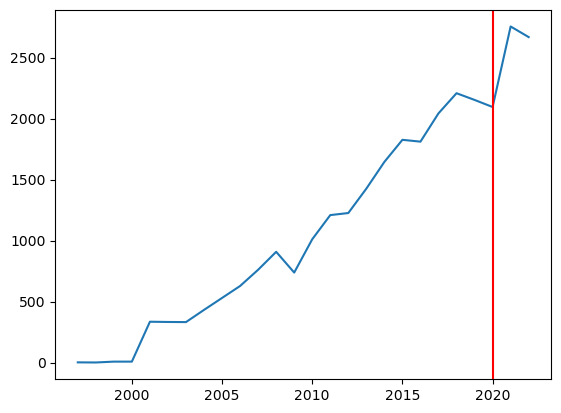

In [4]:
number_billionaires = []
for i in range(1997,2023):
    df = flist.get_df("billionaires", year =i)
    number_billionaires.append(df.shape[0])
plt.plot(np.arange(1997,2023),number_billionaires,label="Number of billionaires")
plt.axvline(x = 2020,color="red",label="covid")
plt.show()

In [31]:
df_temp

,0,1
0,1997,1997.0
1,Thailand,NaN
2,1.0,NaN


In [5]:
richest400_df.head()

,name,year,month,uri,rank,listUri,finalWorth,category,otherCompensation,person,...,numberOfSiblings,numberOfSiblingsEst,bio,notableDeal,valueCreated,primaryIndustry,portraitImage,landscapeImage,recentEarnings,assetsUnderManagement
0,Billionaires,2022,4,elon-musk,1,billionaires,219000.0,Automotive,0,"{'name': 'Elon Musk', 'uri': 'elon-musk', 'ima...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Billionaires,2022,4,jeff-bezos,2,billionaires,171000.0,Technology,0,"{'name': 'Jeff Bezos', 'uri': 'jeff-bezos', 'i...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Billionaires,2022,4,bernard-arnault,3,billionaires,158000.0,Fashion & Retail,0,"{'name': 'Bernard Arnault & family', 'uri': 'b...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Billionaires,2022,4,bill-gates,4,billionaires,129000.0,Technology,0,"{'name': 'Bill Gates', 'uri': 'bill-gates', 'i...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Billionaires,2022,4,warren-buffett,5,billionaires,118000.0,Finance & Investments,0,"{'name': 'Warren Buffett', 'uri': 'warren-buff...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
#checking if 
richest400_df.person[0]["name"]

'Elon Musk'

In [7]:
richest400_df.to_csv('2022_data.csv', sep=',')

### Creating the new name column because uri isn't the same as the Personname column from our original dataset

In [8]:
#we will use this function on every loaded dataset to have consistent names in each dataFrame 
def uri_to_name(data):
    lst = []
    for index, row in data.iterrows():
        lst.append(row['person']["name"])
    data.name = pd.Series(lst)
uri_to_name(richest400_df)
richest400_df.head()

,name,year,month,uri,rank,listUri,finalWorth,category,otherCompensation,person,...,numberOfSiblings,numberOfSiblingsEst,bio,notableDeal,valueCreated,primaryIndustry,portraitImage,landscapeImage,recentEarnings,assetsUnderManagement
0,Elon Musk,2022,4,elon-musk,1,billionaires,219000.0,Automotive,0,"{'name': 'Elon Musk', 'uri': 'elon-musk', 'ima...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Jeff Bezos,2022,4,jeff-bezos,2,billionaires,171000.0,Technology,0,"{'name': 'Jeff Bezos', 'uri': 'jeff-bezos', 'i...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Bernard Arnault & family,2022,4,bernard-arnault,3,billionaires,158000.0,Fashion & Retail,0,"{'name': 'Bernard Arnault & family', 'uri': 'b...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Bill Gates,2022,4,bill-gates,4,billionaires,129000.0,Technology,0,"{'name': 'Bill Gates', 'uri': 'bill-gates', 'i...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Warren Buffett,2022,4,warren-buffett,5,billionaires,118000.0,Finance & Investments,0,"{'name': 'Warren Buffett', 'uri': 'warren-buff...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### testing if the column i created is exactly the same as the original data

In [9]:
original_data = pd.read_csv("forbes_2022_billionaires.csv")

In [10]:
#compares the two series
original_data.personName.compare(richest400_df.name)

,self,other
10,Gautam Adani & family,Gautam Adani
48,He Xiangjian,He Xiangjian & family
49,Miriam Adelson,Miriam Adelson & family
87,Fan Hongwei & family,Fan Hongwei
154,Lin Jianhua & family,Lin Jianhua
178,Xing Wang,Wang Xing
188,Richard Qiangdong Liu,Richard Liu
192,Shuirong Li,Li Shuirong
237,Li Ge,Ge Li
247,Paul Xiaoming Lee & family,Paul Lee


### I'll change the original column to the imported names since they are probably better formated

In [11]:
original_data["name"] = richest400_df.name
formatednames_data = original_data.drop("personName",axis=1)
formatednames_data.to_csv("forbes_2022_billionaires_goodnames.csv")

### functions 

In [88]:
def get_rank_wealth(name,year): #gives the rank and the wealth of the billionaire a certain year
    df = flist.get_df("billionaires", year =year)
    uri_to_name(df)
    
    if name in df.name.values:
        num_billionaires = df.shape[0]
                #this is the min max scaling of the rank of each billionaire by year
                #max+1               -  value                                         - min / max - min
        rank = ((num_billionaires+1) - int(df[df.name == name].finalWorth.index[0]+1) - 1)/(num_billionaires - 1)
        
        wealth = int(df[df.name == name].finalWorth.values[0])
        return rank,wealth
    else:#if the name isnt in this year returns rank 0 and wealth 0
        return 0,0
   

In [89]:
get_rank_wealth("Elon Musk",2020)   

(0.9856733524355301, 24600)

In [90]:
#Called rank_ column isntead of rank, it caused a weird bug
def list_of_wealth(name,start=1997,stop=2022):
    rank_wealth = pd.DataFrame(columns=["rank_","wealth"])

    for year in range(start,stop+1):
        
        rank,wealth = get_rank_wealth(name,year)
        print(year,rank,wealth)
        rank_wealth = rank_wealth.append({"rank_":rank,"wealth":wealth},ignore_index=True)
    return rank_wealth
    
elon=list_of_wealth("Elon Musk")
elon

1997 0 0
1998 0 0
1999 0 0
2000 0 0
2001 0 0
2002 0 0
2003 0 0
2004 0 0
2005 0 0
2006 0 0
2007 0 0
2008 0 0
2009 0 0
2010 0 0
2011 0 0
2012 0.4579591836734694 2000
2013 0.6168421052631579 2700
2014 0.9038929440389294 8400
2015 0.9452054794520548 12000
2016 0.9486187845303867 10700
2017 0.9613124387855044 13900
2018 0.9759855006796556 19900
2019 0.9818773234200744 22300
2020 0.9856733524355301 24600
2021 0.9996368917937546 151000
2022 1.0 219000


,rank_,wealth
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
5,0,0
6,0,0
7,0,0
8,0,0
9,0,0


### Plot of the wealths over the year, color is normalized rank compared to all the other billionaires

1997 0 0
1998 0 0
1999 0 0
2000 0 0
2001 0 0
2002 0 0
2003 0 0
2004 0 0
2005 0 0
2006 0 0
2007 0 0
2008 0 0
2009 0 0
2010 0 0
2011 0 0
2012 0.4579591836734694 2000
2013 0.6168421052631579 2700
2014 0.9038929440389294 8400
2015 0.9452054794520548 12000
2016 0.9486187845303867 10700
2017 0.9613124387855044 13900
2018 0.9759855006796556 19900
2019 0.9818773234200744 22300
2020 0.9856733524355301 24600
2021 0.9996368917937546 151000
2022 1.0 219000
1997 0 0
1998 0 0
1999 0 0
2000 0 0
2001 0 0
2002 0 0
2003 0 0
2004 0 0
2005 0 0
2006 0 0
2007 0 0
2008 0 0
2009 0 0
2010 0 0
2011 0 0
2012 0 0
2013 0 0
2014 0 0
2015 0 0
2016 0 0
2017 0.5905974534769833 2500
2018 0.7195287720888084 3700
2019 0.5223048327137546 2300
2020 0.505730659025788 2100
2021 0 0
2022 0.6280464941882264 3100


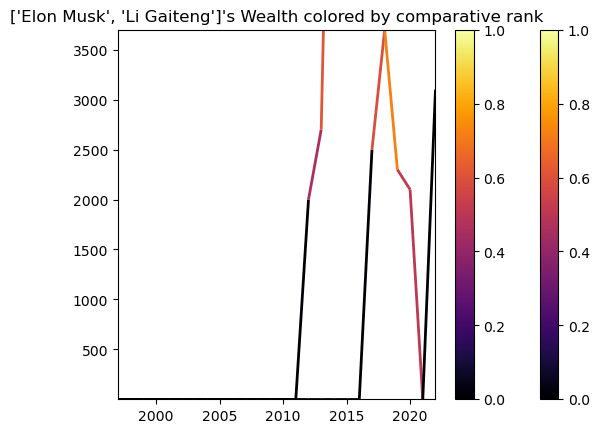

In [110]:
def color_map_color(value, cmap_name='inferno', vmin=0, vmax=1):
    # norm = plt.Normalize(vmin, vmax)
    norm = matplotlib.colors.Normalize(vmin=vmin, vmax=vmax)
    cmap = cm.get_cmap(cmap_name)  # PiYG
    rgb = cmap(norm(abs(value)))[:3]  # will return rgba, we take only first 3 so we get rgb
    color = matplotlib.colors.rgb2hex(rgb)
    return color

def plot_wealth_rank_billionaire(names = ["Elon Musk"]):
    fig, ax = plt.subplots()
    min_,max_ = 100000,-1
    for name in names:
        bill = list_of_wealth(name)
        y,r = bill.wealth.values,bill.rank_.values #wealth for y axis, rank for coloring the segments
        x = np.arange(1997,2023)#years in X axis


        points = np.array([x, y]).T.reshape(-1, 1, 2)
        segments = np.concatenate([points[:-1], points[1:]], axis=1)

        # Create a continuous norm to map from data points to colors

        #lc = LineCollection(segments, cmap='prism',colors = cm.hot(list(r)))
        lc = LineCollection(segments, cmap='inferno',colors = list(map(color_map_color,r)))
        
    
        # Set the values used for colormapping
        lc.set_array([0,1])
        lc.set_linewidth(2)
        lc.set_label('Line Number')
        line = ax.add_collection(lc)
        
        #for window of visualization
        
    fig.colorbar(line, ax=ax)

    ax.set_title(f"{names}'s Wealth colored by comparative rank")

    ax.set_xlim(x.min(), x.max())
    ax.set_ylim(1, y.max())

    plt.show()
plot_wealth_rank_billionaire(["Elon Musk","Li Gaiteng"])

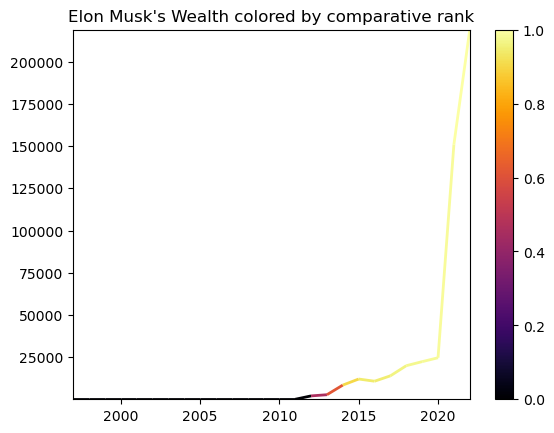

In [107]:


def color_map_color(value, cmap_name='inferno', vmin=0, vmax=1):
    # norm = plt.Normalize(vmin, vmax)
    norm = matplotlib.colors.Normalize(vmin=vmin, vmax=vmax)
    cmap = cm.get_cmap(cmap_name)  # PiYG
    rgb = cmap(norm(abs(value)))[:3]  # will return rgba, we take only first 3 so we get rgb
    color = matplotlib.colors.rgb2hex(rgb)
    return color


fig, ax = plt.subplots()
y,r = elon.wealth.values,elon.rank_.values
x = np.arange(1997,2023)


points = np.array([x, y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)

# Create a continuous norm to map from data points to colors

#lc = LineCollection(segments, cmap='prism',colors = cm.hot(list(r)))
lc = LineCollection(segments, cmap='inferno',colors = list(map(color_map_color,r)))
# Set the values used for colormapping
lc.set_array([0,1])
lc.set_linewidth(2)
lc.set_label('Line Number')
line = ax.add_collection(lc)
fig.colorbar(line, ax=ax)


name = "Elon Musk"
ax.set_title(f"{name}'s Wealth colored by comparative rank")

ax.set_xlim(x.min(), x.max())
ax.set_ylim(1, y.max())

plt.show()

0 -1
0 -1
0 -1
0 -1
0 -1
0 -1
0 -1
0 -1
0 -1
0 -1
0 -1
0 -1
0 -1
0 -1
0 -1
2000 665


AttributeError: 'AxesSubplot' object has no attribute 'line'

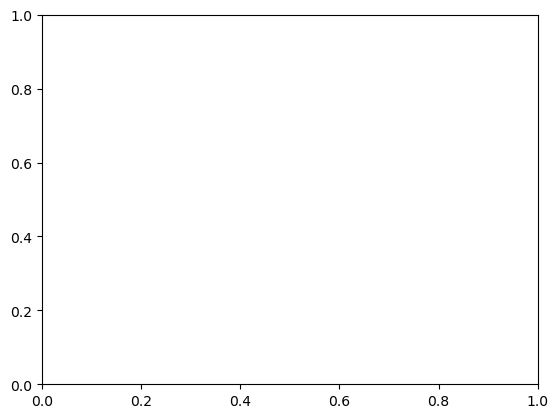

In [26]:
import matplotlib.colors as co
import matplotlib.cm as cm

fig, ax = plt.subplots()
years = np.arange(1997,2023)
for i in range(2023-1997):
    #i want to normalize the rank to map to a color
    norm = co.Normalize(vmin=1, vmax=number_billionaires[i]) #number_billionaires every year, we use it to scale the rank to color the curve
    w,r = elon.wealth[i],elon.rank_[i]
    print(w,r)
    if w!=0: #if data exists for this year, we plot it
        ax.plot(years[i], w,color=cm.hot(norm(r)),label="Elon Musk")

plt.show()

### I am doing this because of a display problem in the world map, the names of countries are wrong in number_billionaires_by_year.csv, I want to map the ones extracted from the json and map it to the number_billionaires_by_year

In [12]:
from urllib.request import urlopen
  
# import json
import json


url = 'https://raw.githubusercontent.com/python-visualization/folium/master/examples/data/world-countries.json'
  
# store the response of URL
response = urlopen(url)
  
# storing the JSON response 
# from url in data
data_json = json.loads(response.read())

names = []
for i in range(len(data_json["features"])):
    names.append(data_json["features"][i]["properties"]["name"])

In [19]:
import pandas as pd
df_number = pd.read_csv("number_billionaires_by_year.csv",sep=";")

0        United States
1                China
2                India
3              Germany
4       United Kingdom
             ...      
1342            Brazil
1343           Germany
1344         Hong Kong
1345           Lebanon
1346          Thailand
Name: country, Length: 1347, dtype: object

In [26]:
lst = []
for country in df_number["country"]:
    if(country not in names):
       lst.append(country)
set(lst) 

{'Andorra',
 'Bahamas',
 'Bahrain',
 'Bermuda',
 'British Virgin Islands',
 'Cayman Islands',
 'Czechia',
 'Eswatini (Swaziland)',
 'Guernsey',
 'Hong Kong',
 'Hong Kong SAR',
 'Liechtenstein',
 'Macau',
 'Monaco',
 'Scotland',
 'Seychelles',
 'Singapore',
 'Tanzania',
 'Turks and Caicos Islands',
 'U.S. Virgin Islands',
 'United States',
 nan}

In [33]:
names #good names that we want

['Afghanistan',
 'Angola',
 'Albania',
 'United Arab Emirates',
 'Argentina',
 'Armenia',
 'Antarctica',
 'French Southern and Antarctic Lands',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Burundi',
 'Belgium',
 'Benin',
 'Burkina Faso',
 'Bangladesh',
 'Bulgaria',
 'The Bahamas',
 'Bosnia and Herzegovina',
 'Belarus',
 'Belize',
 'Bolivia',
 'Brazil',
 'Brunei',
 'Bhutan',
 'Botswana',
 'Central African Republic',
 'Canada',
 'Switzerland',
 'Chile',
 'China',
 'Ivory Coast',
 'Cameroon',
 'Democratic Republic of the Congo',
 'Republic of the Congo',
 'Colombia',
 'Costa Rica',
 'Cuba',
 'Northern Cyprus',
 'Cyprus',
 'Czech Republic',
 'Germany',
 'Djibouti',
 'Denmark',
 'Dominican Republic',
 'Algeria',
 'Ecuador',
 'Egypt',
 'Eritrea',
 'Spain',
 'Estonia',
 'Ethiopia',
 'Finland',
 'Fiji',
 'Falkland Islands',
 'France',
 'Gabon',
 'United Kingdom',
 'Georgia',
 'Ghana',
 'Guinea',
 'Gambia',
 'Guinea Bissau',
 'Equatorial Guinea',
 'Greece',
 'Greenland',
 'Guatemala',
 'Guyana',

In [35]:
#manualy changing the names and assigning broader country names for the visualisation
#i selected only coutnries with more than 1 billionaire
dicti = {
 
 'Czechia':"Czech Republic",

 'Hong Kong':"China",
 'Macau':"China",
 'Monaco':"France",
 'Scotland':'United Kingdom',
    
 'Singapore':"Malaysia",
    
    
 'United States':"United States of America"}

In [45]:
#solution
lst = []
for country in df_number["country"]:
    if(country in dicti.keys()): #checking if we can change it
       lst.append(dicti[country])
    else:
        lst.append(country)
pd.Series(lst).to_csv("data/Good_country_names.csv")

In [48]:
df = pd.read_csv("number_billionaires_by_year.csv",sep=";")

In [49]:
df

,year,country,number
0,2022,United States of America,748
1,2022,China,571
2,2022,India,158
3,2022,Germany,112
4,2022,United Kingdom,87
...,...,...,...
1342,1999,Brazil,1
1343,1999,Germany,1
1344,1999,China,1
1345,1998,Lebanon,1


In [57]:
aggregation_functions = {'number': 'sum',  'year': 'first',"country":"first"}
df_new = df.groupby(["year",'country']).aggregate(aggregation_functions)

In [68]:
df_new.to_csv("number_billionaires_by_year.csv")
#then deleted manually the last two columns redundent